# Welcome to Data Star: Basic Statistics Course

## What will we cover

Over the course of two days, we will explore the idea of descriptive statistics, that is, where the statistics can be computed for all your existing data. To do so, we will do some data exploration. Then, we will get to the basics of probability and its connection to statistics. Some typical and exemplary probability distributions will be introduced. Finally, we end the course with some inferential statistics and Hypothesis testing.

## Content outline (Day 1.1)
[Data Exploration](#data_exploration)

1. Frequency table (counts and percentages)
2. Histogram
3. Cross tabulation
4. Bar graph

[Measures of Central Tendency](#central_tendency)
1. Median
2. Mean
3. Mode

[Measures of Dispersion/Variability](#dispersion)
1. Range
2. Quantiles (quartiles, percentiles, and Inter-Quartile Range)
3. Outliers
4. Variance and Standard Deviation
5. Boxplot

[Pearson's correlation coefficient](#correlation)

<a id='data_exploration'></a>

## Data exploration

Our exploration will begin by describing some typical data sets a data practitioner (such as yourself) will encounter. Data comes in many forms: structured, unstructured, and semi-structured. Here, we explore with some simple and structured data sets that have a relational format. Lets look at the iris dataset. This dataset contains information about the length of various parts of flowers, and the corresponding species of the flower. It is frequently cited in pattern recognition literature and is often used by machine learning practitioners as a practice set.

Read more about it here: https://archive.ics.uci.edu/ml/datasets/iris

Let's load and view this data set.

In [1]:
data("iris")
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


As you can see, the data is a table consisting of rows and colummns. Each column represents a variable relating to the flower, whilst each row corresponds to a different sample. Each column has a restriction on what values the fields can hold. The values of these fields can either be quantitative (as in Sepal.Width) or categorical (as in Species). In R, they are encoded as numeric or factor types.

Categorical types can be further subdivided into nominal and ordinal. Nominal values do not have any implicit ordering to them, and are merely used to distinguish between different categories. I like to think of gender as a nominal value - it would not make sense to 'rank' women above men, or vice versa. The column "Species" has nominal values. Ordinal data are just nominal data but with an implicit ordering defined. For those familiar with market surveying, the Likert scale is a common example of Ordinal data.

Read more about them here: https://en.wikipedia.org/wiki/Likert_scale

Let's look at how the "Species" values are distributed.

In [2]:
cat("The unique categories of species are:\n") #print 
unique(iris$Species)

cat("The frequency table of species are:\n")
( tab <- table(iris$Species))#lst where 50 values

cat("The precentages for each category of species are:\n")
round(tab/sum(tab)*100, 2)

The unique categories of species are:


[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

The frequency table of species are:



    setosa versicolor  virginica 
        50         50         50 

The precentages for each category of species are:



    setosa versicolor  virginica 
     33.33      33.33      33.33 

Quantitative data types can be subdivided into interval and ratio. Interval specifies the start and end points of each numerical value, while ratio has a meaningful zero-point defined. The types of the first four columns of the iris dataset are of a ratio type, since length has a meaningful zero (A measurement of 0cm is a valid one). It is possible to convert finer types to coarser types, that is from ratio -> interval -> ordinal -> nominal, but not the other way round. 

Let's use the cut( ) function to convert petal lengths into 3 intervals.

In [3]:
petalLength <- cut(iris$Petal.Length, breaks=3)#divide into 3 parts
cat("The unique intervals of petal length are:\n") 
unique(petalLength)

cat("Their frequencies are:\n")
# convert the names of the factors so that it is more readable
levels(petalLength) <- c('short', 'medium', 'long')
( tab <- table(petalLength) )

cat("and their cumulative frequencies are:\n")
# convert to vector so that cumsum() can be applied
cumFreqPetalLength <- cumsum(as.vector(tab))/sum(tab)*100
# changing the names of the vector elements
names(cumFreqPetalLength) <- levels(tab)
# round off to 2 decimal digits
round(cumFreqPetalLength, digits=2)

The unique intervals of petal length are:


[1] (0.994,2.97] (2.97,4.93]  (4.93,6.91] 
Levels: (0.994,2.97] (2.97,4.93] (4.93,6.91]

Their frequencies are:


petalLength
 short medium   long 
    50     54     46 

and their cumulative frequencies are:


[1]  33.33  69.33 100.00

## Histogram

This introduces us to the concept of histogram and binning. A histogram works by separating the numeric values according to the counts of values in equal-sized bins. For plotting a histogram, we will use the library ggplot2.

In [4]:
library(ggplot2)

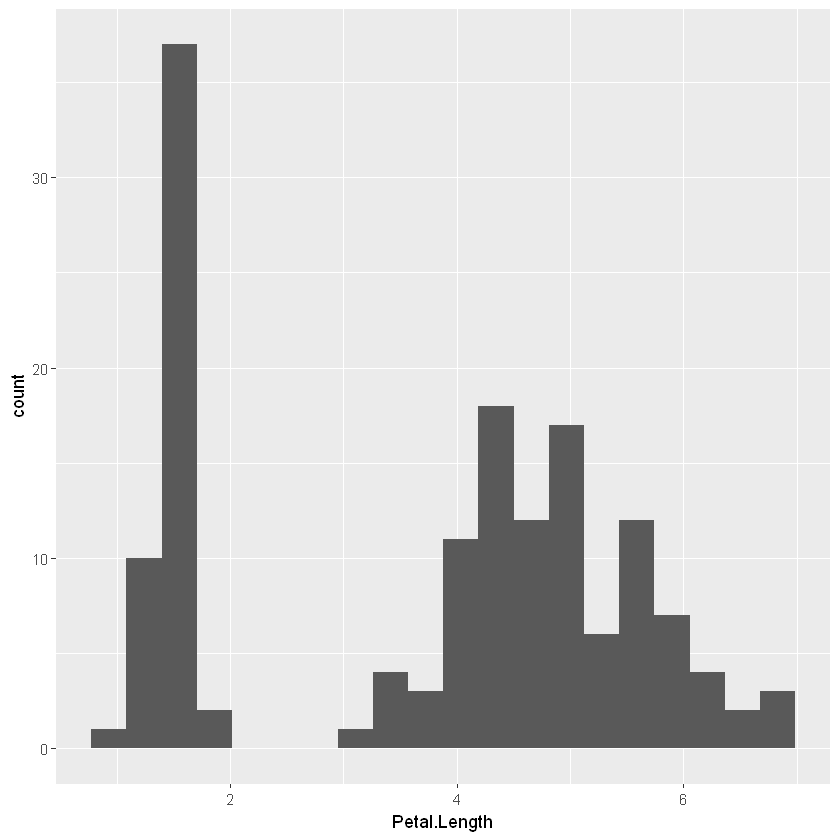

In [5]:
ggplot(iris, aes(x=Petal.Length)) + geom_histogram(bins=20)

This histogram divides data into more detailed bins. It can be seen that there are distinct clusters in the distribution of petal length.

## Cross tabulation

We will try cross tabulation of the 3 splits with species.

In [6]:
tab <- table(iris$Species, petalLength)
tab <- cbind(tab, sum=table(iris$Species))
tab <- rbind(tab, sum=c(table(petalLength), sum(table(petalLength))))
tab

,short,medium,long,sum
setosa,50,0,0,50
versicolor,0,48,2,50
virginica,0,6,44,50
sum,50,54,46,150


From this table, we see that all the 50 plants of short petal length are of species setosa; that among the 54 of medium petal length, 48 are of species versicolor; and that among the 46 of long petal length, 44 are of species virginica.

If you will be taking Machine Learning later in the data science specialization, you will know that petal length is a useful predictor of species.

## Bar graph

Next, we will use a bar plot to view values where many variables are included side-by-side. First we will extract the counts of a column of the "mpg" data set.

In [7]:
library(dplyr)
data(mpg)

mpgManuCount <- count(mpg, manufacturer)
head(mpgManuCount)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



manufacturer,n
audi,18
chevrolet,19
dodge,37
ford,25
honda,9
hyundai,14


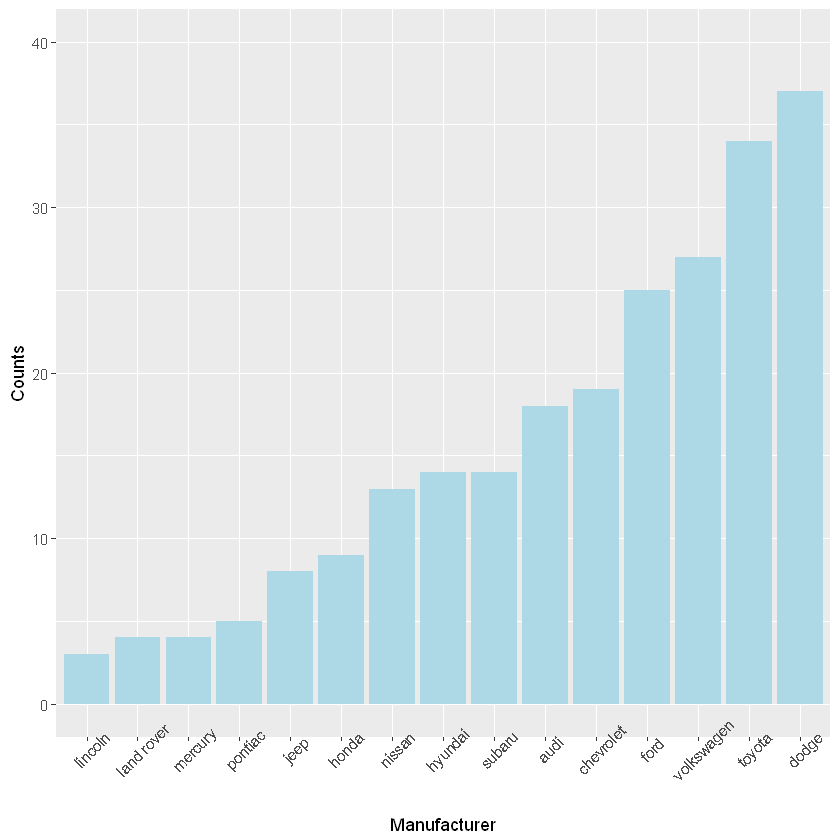

In [8]:
ggplot(mpgManuCount, aes(x=reorder(manufacturer, n), y=n)) + 
    geom_bar(stat='identity', fill='lightblue') + ylim(0,40) +
    theme(axis.text.x=element_text(angle=45)) +
    labs(y='Counts', x='Manufacturer')

<a id='central_tendency'></a>

# Measures of Central Tendency #

## These measures describe the center of a distribution through the use of the mode, median and mean. ##

#### Lets begin by generating a random list of 20 integers from a uniform distribution with integers ranging from 0 to 8 ####

In [9]:
set.seed(1)
# This will ensure we all get the same 'randomised' numbers
list_1 <- floor(runif(20, min=0, max=9))
list_1

[1] 2 3 5 8 1 8 8 5 5 0 1 1 6 3 6 4 6 8 3 6

### Median ###

- The median is the middle number when your data is sorted in ascending order from smallest to largest
- In the case of even numbers (size of data), you take the average of the two middle elements
- In the case of odd numbers, you take the number that equally bisects the amount of numbers to the left and right
- This datum is immune to extreme data
- R has a built-in function to calculate the median through median( ) but you can easily do this manually

In [10]:
# How long is list_1? We need to know if it is odd or even to determine which strategy to follow

length(list_1)


[1] 20

In [11]:
# Since our list has 20 elements, our median is the average between element 10 & 11

# Sorting our data 

sort(list_1)

[1] 0 1 1 1 2 3 3 3 4 5 5 5 6 6 6 6 8 8 8 8

Since our list has 20 elements, our median is the average between element 10 & 11


In [12]:
list_1 <- sort(list_1)
# Sort the list in ascending order, re-assigning it to the same variable
manual_median <- (list_1[10] + list_1[11]) / 2
# summing up the 10th and 11th elements, divide by two
manual_median

[1] 5

In [13]:
# We can find the median of this same list through the use of the median () function
built_median <- median(list_1)
built_median

[1] 5

In [14]:
# Are these figures the same? We can use an operator to find out
manual_median == built_median # the '==' operator will check if the left side is the same as the right

[1] TRUE

In [15]:
# In the case of an ODD number of elements, the median will be the 'middle' of that ordered list
list_2 <- floor(runif(19, min=0, max=9)) # Note that there are 19 values in list_2
median(list_2)
sort(list_2)[ceiling(length(list_2)/2)]   # This indexes the 10th element 
                                        # which lies exactly 9 elements away from the beginning & end

[1] 4

[1] 4

### Mean ###

- The equation for the mean is \begin{equation} \bar x = \frac{\sum x}{n}, \end{equation} where $\bar x$ bar is the mean, $\Sigma$ is a summation, and $n$ is the number of cases
- The mean is the sum of all data, divided by the number of data points
- Again, R has a function that automatically calculates this for us (mean ( )), but we can also achieve the same answer manually
- The mean is easily understood and simple to calculate, but can be heavily influenced by outliers

In [16]:
# Lets use the built-in function to find the mean

built_mean <- mean(list_1)
built_mean

[1] 4.45

In [17]:
# Calculating this manually

manual_mean <- sum(list_1)/length(list_1) # sums up the entire list then divides by the number of elements (n)
manual_mean

[1] 4.45

In [18]:
# Finally, we'll check if these values align

built_mean == manual_mean

[1] TRUE

### Mode ###

- The mode is the value that occurs the most often, or in other words, the most common outcome. 
- Unfortunately, there is no function for this, but you can write a function yourself to calculate the mode


Lets remind ourselves what list_1 looks like

In [19]:
list_1 # remember that we sorted it earlier

[1] 0 1 1 1 2 3 3 3 4 5 5 5 6 6 6 6 8 8 8 8

You cannot always assume unimodality, i.e. there may be more than one mode in your data.

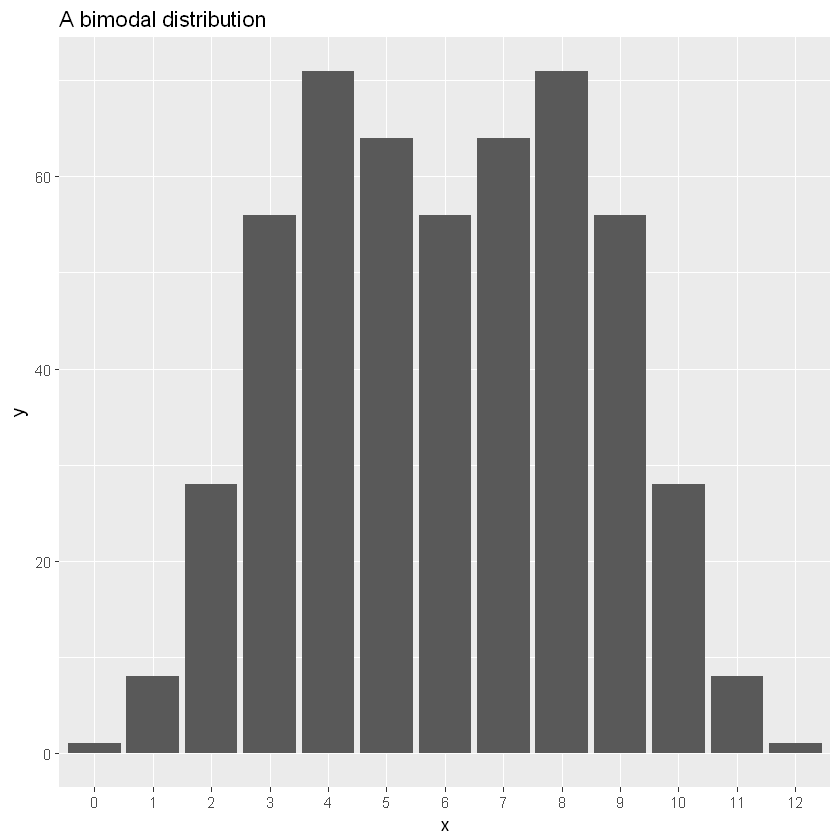

In [20]:
bimodal <- function(i) { choose(8,i) + choose(8,i-4)}
bimodal_dist <- sapply(0:12, bimodal)
ggplot(data.frame(y=bimodal_dist), aes(x=factor(0:12), y=y)) + 
    geom_bar(stat='identity') + labs(x='x', title='A bimodal distribution')

Below is a function to retrieve the mode(s) in a given dataset, it comes from a contributor on stackoverflow and has been simplified:  https://stackoverflow.com/questions/2547402/is-there-a-built-in-function-for-finding-the-mode.

Take a second to reflect and interpret what the code does before running it.

In [21]:
# This particular function can take three different methods
# nmodes will find out the number of modes
# mode will return a single mode
# modes will return all the modes in a multi-modal dataset

modeav <- function (x, na.rm = FALSE)
{
  x <- unlist(x)
  if (na.rm)
    x <- x[!is.na(x)]
  u <- unique(x)
  n <- length(u)
  #get frequencies of each of the unique values in the vector
  frequencies <- rep(0, n)
  for (i in seq_len(n)) {
    if (is.na(u[i])) {
      frequencies[i] <- sum(is.na(x))
    }
    else {
      frequencies[i] <- sum(x == u[i], na.rm = TRUE)
    }
  }
  
  #list of all modes
  u[which(frequencies==max(frequencies), arr.ind = FALSE, useNames = FALSE)]
}
    
modeav(list_1)

[1] 6 8

In [22]:
# Here is another example with three different modes in the dataset. 
# Remember that mode becomes harder to find manually as your dataset scales up in size

list_3 = c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,5,5,6,7,8,8,9,9,9,24)

modeav(list_3)

[1] 1 2 3

Great! Now we know there are three modes in our dataset and that they are the numbers 1, 2 and 3 

### So which measure is the best measure of central tendency? 

It depends on both the type of data you have (ordinal, nominal, ratio) but also on the actual data itself (presence of large outliers)
- The mean is what we need for an average
- The median is more robust to outliers
- For categorical data, only mode can be used

In [23]:
# In this extreme example, the median of list_3 is unaffected by the huge outlier, 24

list_3
median(list_3)

[1]  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  5  5  6  7  8  8  9  9
[26]  9 24

[1] 3

In [24]:
# Lets make a list of non-quantitative values

Fruit_basket <- c('Apple','Orange','Apple','Banana','Apple','Peach','Apple','Lemon','Apple')

# And then try to find the mode of this list of values

modeav(Fruit_basket)

[1] "Apple"

In each of these scenario, how would you make sense of the following measures:
- the mean total rainfall within the catchment area of Semenyih Dam in Selangor
- the median of population age in Malaysia being 27.7 years
- the mode of income of individuals in Malaysia

<a id='dispersion'></a>

## Measures of Dispersion/Variability ##

#### Example. #### 
The geographical center of population of a region is a point of the mean of coordinates of the population. Does the center of population, for example in Greater Kuala Lumpur, tell everything about the most popular location in this region? How about the median or mode of coordinates? These measures did not describe a property called Dispersion.

### Understanding the centre of your data is a good start, but it is not the complete picture. You may also want to know how spread out your data is ###

In [25]:
# Lets pretend we have collected data on the number of siblings everyone in the classroom has.
# this is saved as no_siblings

no_siblings <- c(1, 0, 6, 0, 2, 2, 0, 3, 1, 4, 2, 4, 2, 2, 0, 1, 1, 2, 5, 2, 1, 2, 5, 7, 2, 2, 2, 3, 0, 0, 0, 0, 1, 3)

## Range, Percentiles, Interquartile Range (IQR), Outliers, Variance & Standard Deviation

### Range ###

- Range is the difference between the largest and smallest number in the list
- Is it easy to understand and simple to compute but does not necessarily give us the best representation of variability

In [26]:
# The range of no_siblings will be the largest number (7) minus the smallest number (0) which is 7

max(no_siblings) - min(no_siblings) # maximum - minimum of our data

[1] 7

### Percentile ###

- A percentile is a value of a datapoint that is greater than that percentage of data
- For example, the 25th percentile has 25% of all the data lying below it
- The 75th percentile is greater than 75% of the data


In [27]:
no_siblings <- sort(no_siblings)
length(no_siblings)
no_siblings

# Since there are 34 elements in no_siblings, the 25th percentile would be '1'

[1] 34

[1] 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 4 4 5 5 6 7

In [28]:
# We can calculate this quicker using a built-in formula 'quantile'

quantile(no_siblings, c( .25, .50, .75))

# Note that the 50th percentile is the same as the median, as 50% of the data lies below this number

25%  50%  75% 
1.00 2.00 2.75

### Interquartile Range (IQR) ###

- This measure distributes your values to four equal parts, leaving out the extreme values, and is thus robust
- It is the distance between the third quartile and the first quartile
- There is a built-in function for this, but you can also calculate this manually

### Outliers (Tukey's Method) ###

- Outliers are datapoints with a value that is far greater, or far smaller than the rest of the data
- They have values that are more than 1.5 (IQR) above Q3 or 1.5 (IQR) below Q1 (Another reason why calculating IQR is important)

In [29]:
IQR(no_siblings)

[1] 1.75

In [30]:
manual_IQR <- quantile(no_siblings, .75) - quantile(no_siblings, .25)
names(manual_IQR) <- 'IQR'
manual_IQR

IQR 
1.75

### Boxplot ###

- Boxplot is a really efficient way to visualise your IQR as it yields a variety of information with just one command
- The three horizontal lines on the box represent Q1, Q2, Q3
- The length of your box represents the size of your IQR
- The whiskers extend to the distance of 1.5 times the IQR, or to the extent of your data

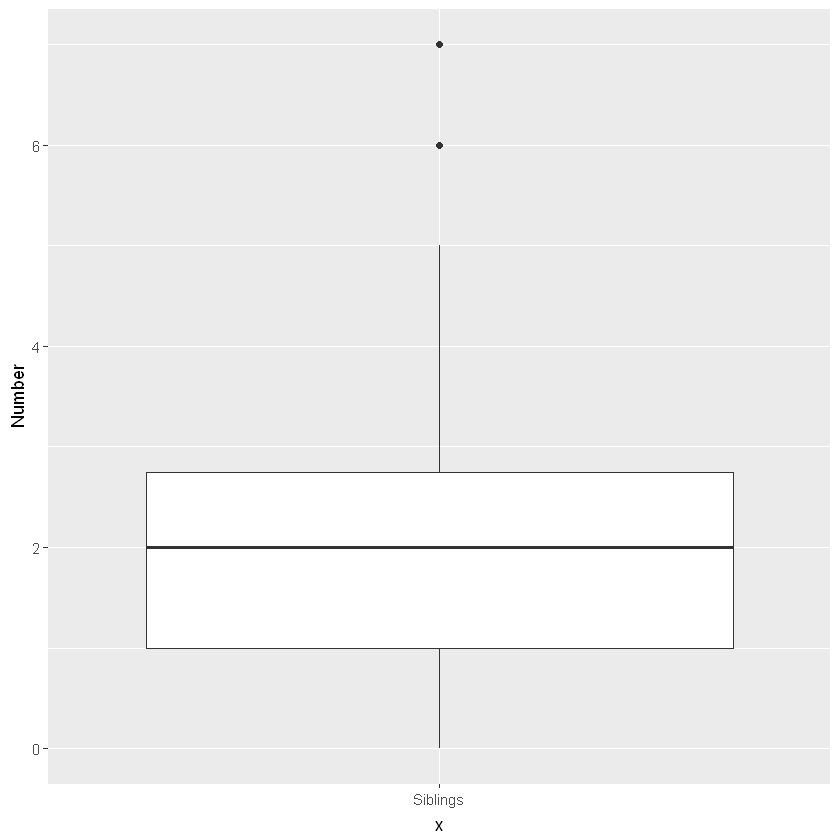

In [31]:
# Lets plot a boxplot with our sibling data from before
library(ggplot2)
no_siblings_df <- data.frame(Number=no_siblings)
ggplot(no_siblings_df, aes(x='Siblings', y=Number)) + geom_boxplot()

In [32]:
# Now we will calculate some figures and compare them against the boxplot above

paste("The IQR is : ", IQR(no_siblings))
paste("The third quantile is : " , quantile(no_siblings, .75))
paste("The first quantile is : " , quantile(no_siblings, .25))
paste("The maximum number is : " , max(no_siblings))
paste("The minimum number is : " ,min(no_siblings))
paste("The range is : " , max(no_siblings) - min(no_siblings))
paste("The lower IQR limit is : " , quantile(no_siblings, .25) - 1.5*IQR(no_siblings))
paste("The upper IQR limit is : " , quantile(no_siblings, .75) + 1.5*IQR(no_siblings))

[1] "The IQR is :  1.75"

[1] "The third quantile is :  2.75"

[1] "The first quantile is :  1"

[1] "The maximum number is :  7"

[1] "The minimum number is :  0"

[1] "The range is :  7"

[1] "The lower IQR limit is :  -1.625"

[1] "The upper IQR limit is :  5.375"

### Variance ###

- Variance is given by the formula 
\begin{equation}
\mathrm{Var} (X) =  \frac{\sum (x - \bar x)^2}{N - 1},
\end{equation}
where x̄ is the mean and N is the number of samples
- It is the average of the squared distance from the mean
- The larger the variance, the more your values are spread out around the mean
- To develop our understanding of variance we will work with the 'iris' dataset again

The importance of variance will be revealed later when we learn the Central Limit Theorem.

In [33]:
# Take a look at the dataset

head(iris) # head() shows us the first few observations

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Lets work with one of the columns, Sepal.Length

In [34]:
sepal_length <- iris$Sepal.Length # Pull out the only column we are concerned about

Lets try to find the variance in Sepal Length for all observations in our dataset

In [35]:
sepal_mean <- mean(sepal_length) # Calculate our mean
subtracted_mean <- sepal_length - sepal_mean # Subtract mean from all observations
sep_len_square <- subtracted_mean^2 # Square these values
sepal_sum <- sum(sep_len_square) # Sum the squares
var_manual <- sepal_sum / (length(sepal_length) - 1) # divide by number of observations
var_manual

[1] 0.6856935

Putting this information in a table for you to understand what is happening

In [36]:
df <- data.frame(sepal_length=sepal_length, subtracted_x_bar=subtracted_mean, 
                 square_subtracted_x_bar=sep_len_square)
head(df) # head() will only pull out the first few observations

sepal_length,subtracted_x_bar,square_subtracted_x_bar
5.1,-0.7433333,0.5525444
4.9,-0.9433333,0.8898778
4.7,-1.1433333,1.3072111
4.6,-1.2433333,1.5458778
5.0,-0.8433333,0.7112111
5.4,-0.4433333,0.1965444


In [37]:
# Calculating the variance using our R built-in function squishes all our preceding lines of code to one command

var(sepal_length)

[1] 0.6856935

In [38]:
# Lets check if these values are the same

var_manual == var(sepal_length)

[1] TRUE

### Standard Deviation ###
- This is the most commonly used measure of dispersion, and is more useful than Variance because it is in the same units as your analysis
- It is defined as the square root of variance $s = \sqrt{\mathrm{Var}(X)}$

In [39]:
# Using the built-in function from R, we can square root the variance we calculated ourselves
sqrt(var_manual)

[1] 0.8280661

In [40]:
# sd () is a built-in function from R to calculate standard deviation

sd(sepal_length) # Note that this is the same value as what we got when we performed the calculation manually

[1] 0.8280661

The standard deviation of 0.828 (3.s.f.) can be interpreted as the square root of the average squared distance of all observations from the mean of 5.84

#### Reference measure

Some other measures (that we are not covering) are:
- Trimean: another measure of central tendency, equals (Q1 + 2 Q2 + Q3) / 4
- Mean Absolute Deviation (MAD): another robust measure of dispersion
- Skewness
- Kurtosis

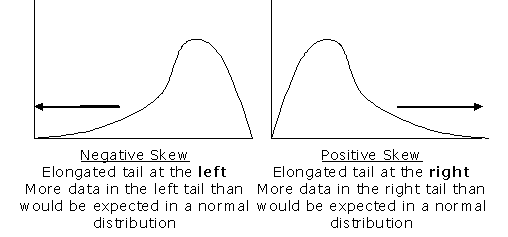

In [41]:
library("IRdisplay")
display_png(file="Skew.png", width = 800, height = 100)

<a id='correlation'> </a>

## Pearson's correlation coefficient

Pearson's correlation coefficient, also called Pearson's $r$, measures on average, how much an increase (decrease) in $X$ is related to an increase (decrease) in $Y$. When the correlation is positive, an increase (decrease) in $X$ corresponds to an increase (decrease) in $Y$. When this coefficient is negative, an increase (decrease) in $X$ corresponds to a decrease (increase) in $Y$.

Pearson's correlation coefficient is defined for a pair of random variables $X$, and $Y$ as \begin{equation}
\mathrm{corr}(X, Y) = \frac{ \textrm{E}((X-\textrm{E}(X))(Y-\textrm{E}(Y))) }{ \sqrt{\textrm{Var}(X)\textrm{Var}(Y)} } \\
= \frac{\sum_i (x_i - \mu_x)(y_i - \mu_y)}{n \sigma_x \sigma_y},
\end{equation}
where E represents the expectation function, $\mu_x$ and $\mu_y$ are the means and $\sigma_x$ and $\sigma_y$ are the standard deviation of $X$ and $Y$, and $n$ is the sample size. To show that this coefficient is only an "average", and may not be appropriate to predict one of $X$ or $Y$ based on the other, an example plot is given.


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



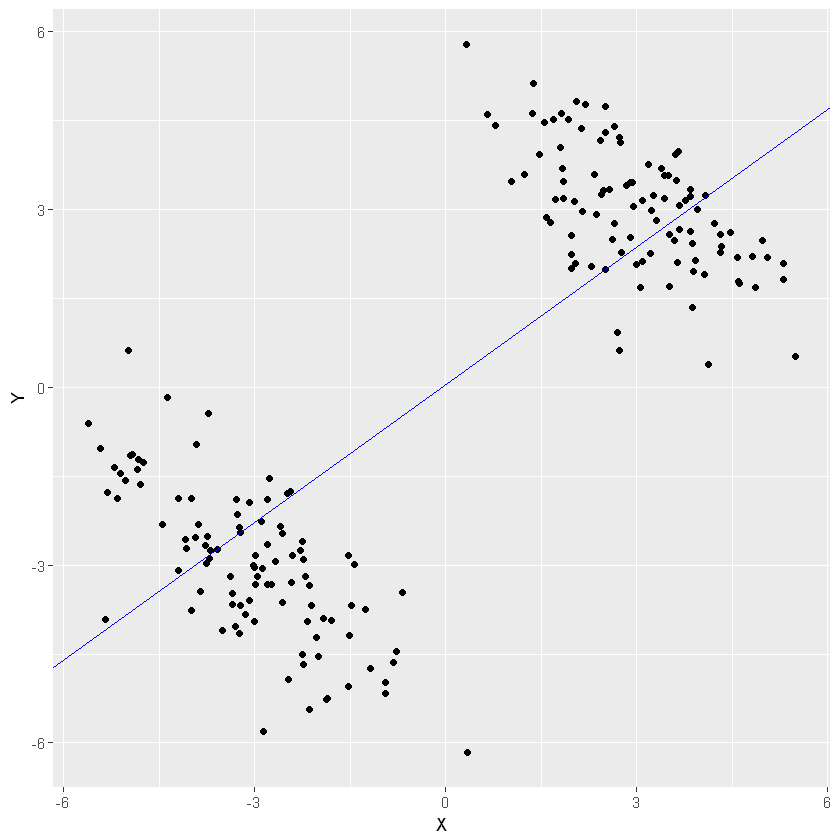

In [42]:
library(MASS)

s1 <- mvrnorm(100, c(3,3), matrix(c(1.5,-1,-1,1.5),2,2))
s2 <- mvrnorm(100, c(-3,-3), matrix(c(1.5,-1,-1,1.5),2,2))
s <- rbind(s1, s2)
s <- data.frame( X=s[,1], Y=s[,2])
lin <- lm(Y ~ X, s)
ggplot(s, aes(x=X, y=Y)) + geom_point() +
    geom_abline(slope=lin$coefficients[2], intercept=lin$coefficients[1], color='blue')

As you can see, the blue line tries to predict $Y$ from $X$ with linear regression by the use of correlation (the slope of the blue line is the correlation coefficient divided by the standard deviation of $X$), but it fails to account for the actual distribution.

The correlation coefficient has a scale that always falls between 1 and -1. When the value is exactly 1 (or -1), we have a perfect linear relation with positive (negative) slope. When the value is 0, the two variables are said to be uncorrelated. The absolute value of this coefficient also shows how strongly correlated the two variables are.

### Download and read file ###

In [43]:
# Download file from the internet and load it into R
urlLocation='http://roycekimmons.com/system/generate_data.php?dataset=exams&n=100'
download.file(url=urlLocation, destfile='exams.csv', method='auto')
examScore <- read.csv(file='exams.csv', header=TRUE)
examScore <- examScore[,c('math.score', 'reading.score', 'writing.score')]
# View some scores
cat('Examples of some exam scores are:')
head(examScore)

Examples of some exam scores are:

math.score,reading.score,writing.score
76,70,64
49,48,40
51,37,34
67,60,56
56,60,60
84,80,79


To find out the correlation between the math and reading scores:

In [44]:
cor(examScore$math.score, examScore$reading.score)

[1] 0.8159577

Correlation can also be gathered from pairs among a selected group of variables. They can be expressed as tables. For example, among math.score, reading.score, and writing.score, we have the pairwise correlations:

In [45]:
cor(examScore[,c('math.score', 'reading.score', 'writing.score')])

,math.score,reading.score,writing.score
math.score,1.0000000,0.8159577,0.8003660
reading.score,0.8159577,1.0000000,0.9512469
writing.score,0.8003660,0.9512469,1.0000000


Correlation is also symmetric, that is,
\begin{equation}
\mathrm{corr}(X, Y) = \mathrm{corr}(Y, X).
\end{equation}
From the table above, we see the the strongest positive correlation is between the reading and writing scores. A plot of them is as follows (please note the close-to-linear positive relationship):

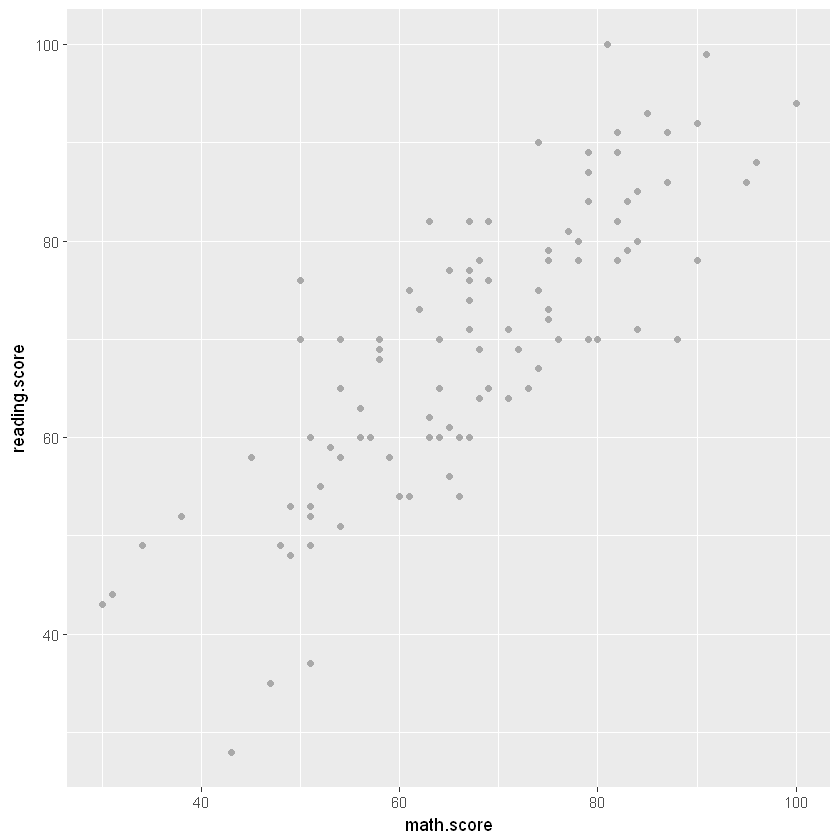

In [46]:
ggplot(examScore, aes(x=math.score, y=reading.score)) +
    geom_point(color='darkgrey')